In [1]:
"""
1. 컨볼루셔널 뉴럴 네트워크(CNN)
    (1) [이론] 
        - 다층 퍼셉트론의 경우 n차원 정보를 1차원으로 변경시킨 후 입력해야 하기 때문에 고유 정보를 손실한다는 단점이 있음
        - 또한 (예를 들어 이미지의 경우) 1차원에선 픽셀 하나하나의 영향이 매우 크게 나타남 -> 상당히 많은 변수를 통제해야 한다는 단점
        - CNN은 사물의 생김새 정보 그 자체로 사물을 학습하고 구별
        
        (i) CNN은 어떻게 특징을 찾아내는가
            - CNN은 고유 이미지를 형변환없이 그대로 입력데이터로 처리
            - 이 과정에서 필터를 이용, 필터를 이미지에 통과시킴으로써(스트라이드) 이미지 구별
            - 필터는 특징을 추출하기 위한 상자같은 것으로, 필터와 이미지가 겹치는 부분을 '수용영역'
            - 필터 안에는 특정한 숫자 값이 있으며, 필터와 이미지 영역의 겹치는 부분마다 곱셈이 이루어짐 -> 최종값이 크다(적다) <=> 필터와 겹치는 부분이 많다(적다)
            - CNN 모델 안에는 각 특징의 개수만큼 여러개의 필터가 존재
            - 스트라이드를 통해 얻어진 행렬을 '피처맵'이라고 하고, 피처맵을 활성화함수에 넣어 구한 행렬을 '액티베이션맵'
            - 액티베이션맵은 '풀링 레이어'를 거치면서 계산의 용이성과 과대적합 방지를 위해 보다 작은 값으로 변환됨
        
        (ii) 제로 패딩
            - 0으로 입력행렬의 테두리를 감싸는 기술
            - CONV(필터가 존재하는 레이어)에 의한 정보 손실 방지 + CNN이 테두리 정보를 활용할 수 있게 됨
            
        (iii) CNN으로 컬러이미지 분류하기
            - 흑백이미지의 텐서는 (28 x 28 기준) (n, 28, 28, 1)이고 컬러이미지는 빨강, 녹색 , 파랑을 사용하므로 (n, 28, 28, 3) ; n은 데이터 수
            - 컬러이미지는 0부터 255까지의 값을 지닌 빨강, 녹색, 파랑 레이어가 겹쳐보이는 색상 -> 겹쳐진 레이어의 개수를 '깊이'라고 부름
            - 컬리이미지를 빨강, 녹색, 파랑으로 분리 후 각각의 필터를 사용 후 만든 3개의 피처맵을 합쳐서 편향값까지 더해 하나의 피처맵을 나타냄
            - 한개의 필터는 하나의 피처맵을 출려하므로 10개의 필터가 한 CONV에 있으면 다음 레이어에 입력되는 깊이는 10
            
        (iv) CNN 모델 학습 이해하기
            - 이미지 -> CONV1 -> CONV2 -> POLL -> FLATTEN -> FC -> 옵티마이저
            - 실습 시 이미지 참고
            
        (v) 파라미터 최적화
            - CNN은 CONV 와 FC에 파라미터가 존재, CONV는 특징을 추출하는 레이어고 FC는 추출된 특징을 가지고 분류를 수행하는 레이어
            - 필터의 역할은 최적화 과정을 통해 모델이 스스로 찾아서 부여
            - CNN은 보통 경사하강법을 사용해 모델 최적화
"""

#(2) [실습] CNN
from IPython.display import Image
Image(url= "https://raw.githubusercontent.com/captainchargers/deeplearning/master/img/practice_cnn.png", width=800, height=200)

# 입력(28 x 28의 흑백 이미지) -> CONV1(28x28 필터 16개를 이용, 16개의 피처맵 생성) -> POOL(14x14 크기의 피처맵으로 축소) -> CONV2(14x14 필터 32개 이용, 32개 피처맵 생성)
# -> POOL(14x14사이즈의 피처맵 32개로 축소) ->  FLATTEN -> FC -> 옵티마이징

In [2]:
import tensorflow as tf

#데이터획득
(x_train, y_train) , (x_test, y_test) = tf.keras.datasets.mnist.load_data()

train data has 50000 samples
every train data is 28 * 28 image


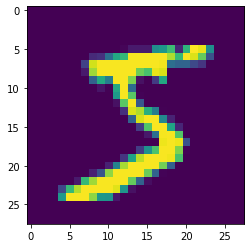

In [6]:
# 데이터 분리
x_val = x_train[50000:60000]
x_train = x_train[0:50000]
y_val = y_train[50000:60000]
y_train = y_train[0:50000]

print("train data has " + str(x_train.shape[0]) + " samples")
print("every train data is " + str(x_train.shape[1]) 
      + " * " + str(x_train.shape[2]) + " image")

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[0])

In [34]:
# 데이터 구조 변경하기
# 28 x 28 흑백 이미지이므로 데이터의 형태를 (28,28,1)로 맞춰줌(흑백이미지이기 때문)

import numpy as np
x_train = np.reshape(x_train, (50000,28,28,1))
x_val = np.reshape(x_val, (10000,28,28,1))
x_test = np.reshape(x_test, (10000, 28, 28, 1))

#데이터 정규화
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')
gray_scale = 255
x_train /= gray_scale
x_val /= gray_scale
x_val /= gray_scale

#원 핫 인코딩
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [35]:
# CNN 텐서플로로 구현하기

#입력 데이터 포맷
x = tf.placeholder(tf.float32, shape = [None, 28, 28, 1])
y_ = tf.placeholder(tf.float32, shape = [None, 10])

#파라미터 초기값 설정
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1) # 0에서부터 거리가 아주 먼 값으로 설정되지 않게 해줌(시그모이드의 경우 입력값이 매우 크거나 작으면 그 미분값이 0과 가까워져서 경사하가법으로 파라미터를 변경하기 어려워짐)
                                                     # truncated_normal은 꼬리를 자른 정규분포로 옵션을 통해 mean, stddev, dtype조절 가능
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape = shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides = [1,1,1,1], padding = 'SAME') # padding = 'SAME' 옵션은 레이어에 입력된 피처맵의 사이즈와 동일하게 피처맵을 출력하도록 설정 ; 패딩을 하지 않을 경우 VALID
    # tf.nn.conv2d(input, filters, strides, padding), input은 입력 이미지 집합으로 4차원 데이터여야함 : [batch, in_height, in_width, on_channels], 각각 데이터개수, 높이, 너비, 이미지의 컬러채널(흑백 1, 칼라 3)
    # filters 역시 4차원 데이터로 [filter_height, filter_width, in_channels, out_channels], 각각 필터 높이, 너비, 필터에 입력되는 이미지의 컬러채널, 필터의 종류
    # stride는 인수의 길이가 4인 벡터, 첫번째와 네번째 수는 항상 1이어야 함, 두번째와 네번째는 가로방향과 세로방향으로 스캐닝을 할 때 건너 뛰는 데이터 숫자로 건너뛰지 않고 모두 필터링 하는 경우엔 strides = [1,1,1,1]
    
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding = 'SAME')
    #tf.nn.max_pool(input, ksize, strides, padding, data_format = None , name = None)

W_conv1 = weight_variable([5,5,1,16]) #첫번째 CONV 레이어는 5x5 필터사이즈의 16개 필터
b_conv1 = bias_variable([16])

#활성화 함수로 ReLU 사용
h_conv1 = tf.nn.relu(conv2d(x,W_conv1) + b_conv1)

#풀링레이어 적용, 액티베이션 맵의 크기를 줄여줌
h_pool1 = max_pool_2x2(h_conv1)

#두번째 CONV 레이어, 총 32개의 필터
W_conv2 = weight_variable([5,5,16,32])
b_conv2 = bias_variable([32])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

In [36]:
#FC(Fully Connected Layer) - 첫번째 FC(128개의 노드)
W_fc1 = weight_variable([7*7*32, 128])
b_fc1 = bias_variable([128])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*32])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

#두번째 FC(10개의 노드)
W_fc2 = weight_variable([128,10])
b_fc2 = bias_variable([10])
y_conv = tf.matmul(h_fc1, W_fc2) + b_fc2

In [37]:
#크로스 엔트로피 설정
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=y_conv))

In [38]:
#아답 옵티마이저를 사용해 모델 최적화, 학습률 = 0.001
train_step = tf.train.AdamOptimizer(0.001).minimize(cross_entropy)

In [39]:
#정확도 구학
correct_prediction = tf.equal(tf.argmax(y_conv, 1) , tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [40]:
#학습 및 테스트

#초기화
init = tf.global_variables_initializer()

#하이퍼 파라미터 세팅
epoch_cnt = 3
batch_size = 500
iteration = len(x_train) // batch_size

#학습시작
with tf.Session() as sess:
    tf.set_random_seed(777)
    
    sess.run(init)
    for epoch in range(epoch_cnt):
        avg_loss = 0
        start = 0
        end = batch_size
        
        for i in range(iteration):
            if i % 10 == 0:
                train_acc = accuracy.eval(feed_dict = {x : x_train[start:end], y_ : y_train[start:end]})
                print('step '+str(i) + ': train acc :'+str(train_acc))
            
            train_step.run(feed_dict = {x:x_train[start:end], y_:y_train[start:end]})
            start += batch_size
            end += batch_size
    
    #모델 검증
        val_accuracy = accuracy.eval(feed_dict={x:x_val , y_:y_val})
        print("validation accuracy : " +str(val_accuracy))
    
    test_accuracy = accuracy.eval(feed_dict = {x:x_test, y_:y_test})
    print("test accuracy :" + str(test_accuracy))
                

step 0: train acc :0.138
step 10: train acc :0.68
step 20: train acc :0.802
step 30: train acc :0.868
step 40: train acc :0.876
step 50: train acc :0.908
step 60: train acc :0.926
step 70: train acc :0.946
step 80: train acc :0.946
step 90: train acc :0.936
validation accuracy : 0.1064
step 0: train acc :0.952
step 10: train acc :0.946
step 20: train acc :0.952
step 30: train acc :0.954
step 40: train acc :0.946
step 50: train acc :0.962
step 60: train acc :0.972
step 70: train acc :0.96
step 80: train acc :0.974
step 90: train acc :0.972
validation accuracy : 0.1064
step 0: train acc :0.966
step 10: train acc :0.972
step 20: train acc :0.962
step 30: train acc :0.962
step 40: train acc :0.97
step 50: train acc :0.978
step 60: train acc :0.978
step 70: train acc :0.972
step 80: train acc :0.978
step 90: train acc :0.978
validation accuracy : 0.1064
test accuracy :0.9744


In [44]:
# 3번의 주기 만으로 97%의 정확도를 보임
# validation accuracy 에러는 잘 모르겠음

In [1]:
"""
2. 순환신경망(RNN)
    (1) [이론] RNN
        - 순차적인 데이터를 입력받아 결괏값을 도출하는데 사용하는 딥러닝 모델 : 이전 입력값들을 고려해서 현재 입력값의 출력값을 결정
        - 자연어 처리에 많이 사용
        
        (i) RNN 구조
            - 레이어에 해당하는 개념으로 '셀'이 존재, 현재 셀의 입력값과 과거 셀의 상태값을 사용해 현재 셀의 상태값 계산 -> 반복
            - h_t = tanh(w_xh * x_t + w_hh* h_t-1 + b)
        
        (ii) RNN으로 문장의 감정 분석하기
            - 문장의 감정은 처음부터 끝까지 단어를 읽은 후 가능 -> RNN은 이와 같은 문제에 적합한 구조를 가지고 있음
            - 손실함수를 통해 최종 상태값에 소프트매스를 취한 값과 실제값 간의 거리를 최소화함으로써 모델 학습 가능
            
    (2) [이론] LSTM
        - RNN 셀 구조 중 하나
        - 경사하강법으로 RNN 학습을 진행할 때 gradient vanishing 또는 gradient exploding으로 인해 모델이 최적화되지 않음 -> 이를 보완하고자 LSTM 셀이 등장
        
        (i) RNN 학습
            - RNN은 경사하강법 기반 알고리즘으로 모델 최적화 : W = W - learning_rate * ∂E/∂W
            - 입력값이 여러개일 경우 chain rule에 따라 계산이 매우 복잡해짐
            - gradient vanishing : 연속해서 곱해지는 모든 미분값들이 1보다 작은 값일 때 멀리있는 정보가 현재 셀에 거의 영향을 미치지 못하는 상황
            - gradient exploding : '' 1보다 큰 값일 때 파라미터가 급변하여 최적의 파라미터 W를 찾지 못하게 되는 현상
        
        (ii) LSTM의 등장
            - '메모리셀'이 추가, 불필요한 정보는 잊고, 필요한 정보는 저장하는 역할 수행
        
        (iii) LSTM의 구조 및 메커니즘
            1) 기억손실 메커니즘 : 메모리셀이 기억하는 과거의 정보에 시그모이드 함수가 곱해져서 1일 경우 과거 메모리셀을 그대로 유지, 1보다 작을 경우 그에 해당하는 값만큼의 기억만 유지
            2) 입력 메커니즘 : 현재 입려값을 메모리셀에 저장하는 메커니즘
            3) 출력 메커니즘 : 현재 상태값을 출력할 때 메모리셀의 정보 이용
            
"""

#.(3) [실습] RNN 기초
import numpy as np

#셀이 하나인 경우 - 출력값(output)과 상태값(sate)가 같다 + 가중치 확인해보기
#기본구조는 입력값(x), 출력값(output), 상태값(state), 가중치(W), 편향값(b), 활성화함수(tanh)로 구성
import tensorflow as tf
inputs = np.array([[[3,4,5]]])

tf.reset_default_graph()
tf.set_random_seed(777)

tf_inputs = tf.constant(inputs, dtype = tf.float32)

rnn_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=3)
outputs, state = tf.nn.dynamic_rnn(cell = rnn_cell, dtype = tf.float32, inputs = tf_inputs)

variables_names = [v.name for v in tf.trainable_variables()]
print(outputs)
print(state)
print('weights')


Tensor("rnn/transpose_1:0", shape=(1, 1, 3), dtype=float32)
Tensor("rnn/while/Exit_3:0", shape=(1, 3), dtype=float32)
weights


In [2]:
variables_names

['rnn/basic_rnn_cell/kernel:0', 'rnn/basic_rnn_cell/bias:0']

In [3]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    values = sess.run(variables_names)
    print(values) #  지금 보여지는 것은 weight값을 나타냄, x -> h 로 갈때 w_hx는 3 x 3, h -> y로 갈 때 w_hy는 3 x 3, 그래서 총 6행

[array([[-0.59238183,  0.36334312,  0.75173855],
       [-0.49057457,  0.2832818 , -0.76840913],
       [ 0.37146485,  0.15716732,  0.3830546 ],
       [-0.60262036,  0.7976357 ,  0.4965744 ],
       [ 0.38772213,  0.6255324 , -0.01987052],
       [ 0.32896936, -0.4309209 ,  0.24104548]], dtype=float32), array([0., 0., 0.], dtype=float32)]


In [4]:
for v in tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES):
    print(v)
    
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    output_run, state_run = sess.run([outputs, state])
    print('output values')
    print(output_run)
    print('\nstate values')
    print(state_run)
    print('\nweight')
    values = sess.run(variables_names)
    for k, v in zip(variables_names, values):
        print(k,v)

<tf.Variable 'rnn/basic_rnn_cell/kernel:0' shape=(6, 3) dtype=float32_ref>
<tf.Variable 'rnn/basic_rnn_cell/bias:0' shape=(3,) dtype=float32_ref>
output values
[[[-0.95468026  0.99514276  0.7993655 ]]]

state values
[[-0.95468026  0.99514276  0.7993655 ]]

weight
rnn/basic_rnn_cell/kernel:0 [[-0.59238183  0.36334312  0.75173855]
 [-0.49057457  0.2832818  -0.76840913]
 [ 0.37146485  0.15716732  0.3830546 ]
 [-0.60262036  0.7976357   0.4965744 ]
 [ 0.38772213  0.6255324  -0.01987052]
 [ 0.32896936 -0.4309209   0.24104548]]
rnn/basic_rnn_cell/bias:0 [0. 0. 0.]


In [6]:
#위의 출력값을 통해 다음을 확인((inputs = np.array([[1,2]])인 경우를 말함)

# RNN 셀이 한개일 경우 출력값과 상태값이 동일
# output values
# [[[-0.9314169   0.75578666 -0.6819246 ]]]

# state values -> 대신 state value는 1x1x3이 아닌 1 x 3으로 나옴
# [[-0.9314169   0.75578666 -0.6819246 ]]


#입력값이 1*2 행렬이고 RNN이 1*3 행렬일 경우 W는 총 5개의 행을 갖게 됨
# weight
# [[-0.62831575  0.38538355  0.79733914]
#  [-0.5203329   0.30046564 -0.8150209 ]
#  [ 0.39399797  0.16670114  0.4062907 ]
#  [-0.6391754   0.8460203   0.5266966 ]
#  [ 0.41124135  0.66347724 -0.0210759 ]]

#입력값이 1*2이고 RNN의 상태값이 1*3의 행렬일 경우 편향값은 총 3개가 필요
#rnn/basic_rnn_cell/bias:0 [0. 0. 0.]




# 텐서플로로 단어 품사 구분하기

#I    [1,0,0,0]
#work [0,1,0,0]
#at   [0,0,1,0]
#google[0,0,0,1]

#I work at google  [[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]]
#I google at work  [[1,0,0,0],[0,0,0,1],[0,0,1,0],[0,1,0,0]]

inputs = np.array([
    [[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]],
    [[1,0,0,0],[0,0,0,1],[0,0,1,0],[0,1,0,0]]
]) #input은 2 x 4 x 4

tf.reset_default_graph()
tf.set_random_seed(777)
tf_inputs = tf.constant(inputs, dtype=tf.float32)
rnn_cell = tf.contrib.rnn.BasicRNNCell(num_units=3) #output은 2 x 4 x 3으로 출력; (a,b,c)에서 c만 c'로 바꾸는 것
outputs, state = tf.nn.dynamic_rnn(cell=rnn_cell, dtype=tf.float32, inputs=tf_inputs)
variables_names = [v.name for v in tf.trainable_variables()] # W가 저장된 주소 받기, W는 x가 h로 갈때 4 x 3 + h가 y로 갈때 3 x 3이므로 7 x 3

print(outputs)
print(state)
print('weight :\n')
for v in tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES):
    print(v)


Tensor("rnn/transpose_1:0", shape=(2, 4, 3), dtype=float32)
Tensor("rnn/while/Exit_3:0", shape=(2, 3), dtype=float32)
weight :

<tf.Variable 'rnn/basic_rnn_cell/kernel:0' shape=(7, 3) dtype=float32_ref>
<tf.Variable 'rnn/basic_rnn_cell/bias:0' shape=(3,) dtype=float32_ref>


In [7]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    output_run, state_run = sess.run([outputs, state])
    print('output values')
    print(output_run)
    print('\nstate value')
    print(state_run)
    print('weights')
    values = sess.run(variables_names)
    
    for k,v in zip(variables_names, values):
        print(k,v)
        
# state는 2 x 4 x 4-> 2 x 4 x 3 이 될 때 2 x 3이 됨

output values
[[[-0.50944704  0.33166462  0.6126557 ]
  [-0.20793891  0.24406303 -0.75278705]
  [-0.06346128 -0.52844936  0.68356085]
  [-0.36491966  0.8857268  -0.02324398]]

 [[-0.50944704  0.33166462  0.6126557 ]
  [-0.30707452  0.62735885  0.21719742]
  [ 0.5043804  -0.14038289  0.3744523 ]
  [-0.11641283  0.70696247 -0.7512605 ]]]

state value
[[-0.36491966  0.8857268  -0.02324398]
 [-0.11641283  0.70696247 -0.7512605 ]]
weights
rnn/basic_rnn_cell/kernel:0 [[-0.56198275  0.34469748  0.7131618 ]
 [-0.4653999   0.2687447  -0.7289769 ]
 [ 0.35240245  0.14910203  0.36339748]
 [-0.57169586  0.7567036   0.47109187]
 [ 0.3678255   0.5934322  -0.01885086]
 [ 0.31208777 -0.40880746  0.22867584]
 [ 0.5521256   0.682691   -0.5481483 ]]
rnn/basic_rnn_cell/bias:0 [0. 0. 0.]


In [8]:
#4.[실습] LSTM 기초 - 출력값, 상태값, 메모리셀 값 출력하기

tf.reset_default_graph()
tf.set_random_seed(777)

tf_inputs = tf.constant(inputs, dtype = tf.float32) #input은 2 x 4 x 4
lstm_cell = tf.nn.rnn_cell.LSTMCell(num_units=1) #outputdms 2 x 4 x 1

outputs, state = tf.nn.dynamic_rnn(cell = lstm_cell, dtype = tf.float32, inputs = tf_inputs)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    _output, _state = sess.run([outputs, state])
    print('output values')
    print(_output)
    print('\nmemory cell value') # 아웃풋에서 가운데 값 뺸 것 -> 2 x 1
    print(_state.c)
    print('\nhidden state value') # 2 x 1
    print(_state.h)
    

output values
[[[ 0.08924279]
  [ 0.01773031]
  [-0.03008365]
  [ 0.02391436]]

 [[ 0.08924279]
  [ 0.06824919]
  [ 0.04068697]
  [-0.00590078]]]

memory cell value
[[ 0.07265329]
 [-0.01204549]]

hidden state value
[[ 0.02391436]
 [-0.00590078]]


In [10]:
#5.[실습] LSTM - 지문을 읽고 주제 분류하기

import tensorflow as tf
import numpy as np
import pandas as pd

paragraph_dict_list = [
         {'paragraph': 'dishplace is located in sunnyvale downtown there is parking around the area but it can be difficult to find during peak business hours my sisters and i came to this place for dinner on a weekday they were really busy so i highly recommended making reservations unless you have the patience to wait', 'category': 'food'},
         {'paragraph': 'service can be slower during busy hours but our waiter was courteous and help gave some great entree recommendations', 'category': 'food'},
         {'paragraph': 'portions are huge both french toast and their various omelettes are really good their french toast is probably 1.5x more than other brunch places great place to visit if you are hungry and dont want to wait 1 hour for a table', 'category': 'food'},
         {'paragraph': 'we started with apps going the chicken and waffle slides and chicken nachos the sliders were amazing and the nachos were good too maybe by themselves the nachos would have scored better but after those sliders they were up against some tough competition', 'category': 'food'},
         {'paragraph': 'the biscuits and gravy was too salty two people in my group had the gravy and all thought it was too salty my hubby ordered a side of double egg and it was served on two small plates who serves eggs to one person on separate plates we commented on that when it was delivered and even the server laughed and said she doesnt know why the kitchen does that presentation of food is important and they really missed on this one', 'category': 'food'},
         {'paragraph': 'the garlic fries were a great starter (and a happy hour special) the pancakes looked and tasted great and were a fairly generous portion', 'category': 'food'},
         {'paragraph': 'our meal was excellent i had the pasta ai formaggi which was so rich i didnt dare eat it all although i certainly wanted to excellent flavors with a great texture contrast between the soft pasta and the crisp bread crumbs too much sauce for me but a wonderful dish', 'category': 'food'},
         {'paragraph': 'what i enjoy most about palo alto is so many restaurants have dog-friendly seating outside i had bookmarked italico from when they first opened about a 1.5 years ago and was jonesing for some pasta so time to finally knock that bookmark off', 'category': 'food'},
         {'paragraph': 'the drinks came out fairly quickly a good two to three minutes after the orders were taken i expected my iced tea to taste a bit more sweet but this was straight up green tea with ice in it not to complain of course but i was pleasantly surprised', 'category': 'food'},
         {'paragraph': 'despite the not so good burger the service was so slow the restaurant wasnt even half full and they took very long from the moment we got seated to the time we left it was almost 2 hours we thought that it would be quick since we ordered as soon as we sat down my coworkers did seem to enjoy their beef burgers for those who eat beef however i will not be returning it is too expensive and extremely slow service', 'category': 'food'},
    
         {'paragraph': 'the four reigning major champions simona halep caroline wozniacki angelique kerber and defending us open champion sloane stephens could make a case for being the quartet most likely to succeed especially as all but stephens has also enjoyed the no1 ranking within the last 14 months as they prepare for their gruelling new york campaigns they currently hold the top four places in the ranks', 'category': 'sports'},
         {'paragraph': 'the briton was seeded nn7 here last year before a slump in form and confidence took her down to no46 after five first-round losses but there have been signs of a turnaround including a victory over a sub-par serena williams in san jose plus wins against jelena ostapenko and victoria azarenka in montreal. konta pulled out of new haven this week with illness but will hope for good things where she first scored wins in a major before her big breakthroughs to the semis in australia and wimbledon', 'category': 'sports'},
         {'paragraph': 'stephens surged her way back from injury in stunning style to win her first major here last year—and ranked just no83 she has since proved what a big time player she is winning the miami title via four fellow major champions then reaching the final at the french open back on north american hard courts she ran to the final in montreal only just edged out by halep she has also avoided many of the big names in her quarter—except for wild card azarenka as a possible in the third round', 'category': 'sports'},
         {'paragraph': 'when it came to england chances in the world cup it would be fair to say that most fans had never been more pessimistic than they were this year after enduring years of truly dismal performances at major tournaments – culminating in the 2014 event where they failed to win any of their three group games and finished in bottom spot those results led to the resignation of manager roy hodgson', 'category': 'sports'},
         {'paragraph': 'the team that eliminated russia – croatia – also improved enormously during the tournament before it began their odds were 33/1 but they played with real flair and star players like luka modric ivan rakitic and ivan perisic showed their quality on the world stage having displayed their potential by winning all three of their group stage games croatia went on to face difficult tests like the semi-final against england', 'category': 'sports'},
         {'paragraph': 'the perseyside outfit finished in fourth place in the premier league table and without a trophy last term after having reached the champions league final before losing to real madrid', 'category': 'sports'},
         {'paragraph': 'liverpool fc will return to premier league action on saturday lunchtime when they travel to leicester city in the top flight as they look to make it four wins in a row in the league', 'category': 'sports'},
         {'paragraph': 'alisson signed for liverpool fc from as roma this summer and the brazilian goalkeeper has helped the reds to keep three clean sheets in their first three premier league games', 'category': 'sports'},
         {'paragraph': 'but the rankings during that run-in to new york hid some very different undercurrents for murray had struggled with a hip injury since the clay swing and had not played a match since losing his quarter-final at wimbledon and he would pull out of the us open just two days before the tournament began—too late however to promote nederer to the no2 seeding', 'category': 'sports'},
         {'paragraph': 'then came the oh-so-familiar djokovic-nadal no-quarter-given battle for dominance in the third set there were exhilarating rallies with both chasing to the net both retrieving what looked like winning shots nadal more than once pulled off a reverse smash and had his chance to seal the tie-break but it was djokovic serving at 10-9 who dragged one decisive error from nadal for a two-sets lead', 'category': 'sports'}
]
df = pd.DataFrame(paragraph_dict_list)
df = df[['paragraph', 'category']]

In [11]:
df.head() #주제가 food인 지문

,paragraph,category
0,dishplace is located in sunnyvale downtown the...,food
1,service can be slower during busy hours but ou...,food
2,portions are huge both french toast and their ...,food
3,we started with apps going the chicken and waf...,food
4,the biscuits and gravy was too salty two peopl...,food


In [12]:
df.tail() #주제가 sports인 지문

,paragraph,category
15,the perseyside outfit finished in fourth place...,sports
16,liverpool fc will return to premier league act...,sports
17,alisson signed for liverpool fc from as roma t...,sports
18,but the rankings during that run-in to new yor...,sports
19,then came the oh-so-familiar djokovic-nadal no...,sports


In [13]:
#데이터 전처리

#1. 모든 단어들을 모아 중복을 제거한 후 단어 리스트 먼저 만들기
results = set()
df['paragraph'].str.lower().str.split().apply(results.update) # df['paragraph'] 문단을 소문자로 모두 전환 -> 띄어쓰기 기준으로 분류 -> result set에 저장

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
Name: paragraph, dtype: object

In [14]:
results

{'(and',
 '1',
 '1.5',
 '1.5x',
 '10-9',
 '14',
 '2',
 '2014',
 '33/1',
 'a',
 'about',
 'action',
 'after',
 'against',
 'ago',
 'ai',
 'alisson',
 'all',
 'almost',
 'also',
 'although',
 'alto',
 'amazing',
 'american',
 'and',
 'angelique',
 'any',
 'apps',
 'are',
 'area',
 'around',
 'as',
 'at',
 'australia',
 'avoided',
 'azarenka',
 'back',
 'battle',
 'be',
 'beef',
 'been',
 'before',
 'began',
 'began—too',
 'being',
 'better',
 'between',
 'big',
 'biscuits',
 'bit',
 'bookmark',
 'bookmarked',
 'both',
 'bottom',
 'brazilian',
 'bread',
 'breakthroughs',
 'briton',
 'brunch',
 'burger',
 'burgers',
 'business',
 'busy',
 'but',
 'by',
 'came',
 'campaigns',
 'can',
 'card',
 'caroline',
 'case',
 'certainly',
 'champion',
 'champions',
 'chance',
 'chances',
 'chasing',
 'chicken',
 'city',
 'clay',
 'clean',
 'commented',
 'competition',
 'complain',
 'confidence',
 'contrast',
 'could',
 'course',
 'courteous',
 'courts',
 'coworkers',
 'crisp',
 'croatia',
 'crumbs',
 

In [18]:
# 단어 딕셔너리 만들기
idx2word = dict(enumerate(results))

In [19]:
idx2word

{0: '–',
 1: 'soft',
 2: 'fans',
 3: 'jelena',
 4: 'outside',
 5: 'final',
 6: 'third',
 7: 'first-round',
 8: 'ranked',
 9: 'exhilarating',
 10: 'brunch',
 11: 'sauce',
 12: 'potential',
 13: 'italico',
 14: 'sweet',
 15: 'lunchtime',
 16: 'were',
 17: 'as',
 18: 'took',
 19: 'injury',
 20: 'quarter-final',
 21: 'oh-so-familiar',
 22: 'happy',
 23: 'peak',
 24: 'busy',
 25: 'open',
 26: 'dare',
 27: 'fourth',
 28: 'error',
 29: 'edged',
 30: 'generous',
 31: 'angelique',
 32: 'left',
 33: 'montreal.',
 34: 'quarter—except',
 35: 'then',
 36: 'big',
 37: 'never',
 38: 'people',
 39: 'fairly',
 40: 'russia',
 41: 'patience',
 42: 'fellow',
 43: 'tournaments',
 44: 'enjoy',
 45: 'djokovic',
 46: 'started',
 47: 'year—and',
 48: 'our',
 49: 'could',
 50: 'two-sets',
 51: 'at',
 52: 'avoided',
 53: 'seeding',
 54: 'much',
 55: 'victory',
 56: 'portions',
 57: 'fc',
 58: 'tasted',
 59: 'been',
 60: 'promote',
 61: 'flair',
 62: 'seating',
 63: 'dishplace',
 64: 'no-quarter-given',
 65: 'bet

In [20]:
word2idx = {v:k for k, v in idx2word.items()}

In [21]:
word2idx

{'–': 0,
 'soft': 1,
 'fans': 2,
 'jelena': 3,
 'outside': 4,
 'final': 5,
 'third': 6,
 'first-round': 7,
 'ranked': 8,
 'exhilarating': 9,
 'brunch': 10,
 'sauce': 11,
 'potential': 12,
 'italico': 13,
 'sweet': 14,
 'lunchtime': 15,
 'were': 16,
 'as': 17,
 'took': 18,
 'injury': 19,
 'quarter-final': 20,
 'oh-so-familiar': 21,
 'happy': 22,
 'peak': 23,
 'busy': 24,
 'open': 25,
 'dare': 26,
 'fourth': 27,
 'error': 28,
 'edged': 29,
 'generous': 30,
 'angelique': 31,
 'left': 32,
 'montreal.': 33,
 'quarter—except': 34,
 'then': 35,
 'big': 36,
 'never': 37,
 'people': 38,
 'fairly': 39,
 'russia': 40,
 'patience': 41,
 'fellow': 42,
 'tournaments': 43,
 'enjoy': 44,
 'djokovic': 45,
 'started': 46,
 'year—and': 47,
 'our': 48,
 'could': 49,
 'two-sets': 50,
 'at': 51,
 'avoided': 52,
 'seeding': 53,
 'much': 54,
 'victory': 55,
 'portions': 56,
 'fc': 57,
 'tasted': 58,
 'been': 59,
 'promote': 60,
 'flair': 61,
 'seating': 62,
 'dishplace': 63,
 'no-quarter-given': 64,
 'between

In [27]:
# word2idx를 이용, 모든 지문을 수치로 전환하기
def encode_paragraph(paragraph):
    words = paragraph.split(" ")
    encoded = []
    for word in words:
        encoded.append([word2idx[word]])
    return encoded

In [29]:
df['enc_paragraph'] = df.paragraph.apply(encode_paragraph) # ★ 데이터프레임에 함수 일괄적용하는 방법

In [31]:
# 분류항목(food or sport)도 수치로 변경 -> 원 핫 인코딩 이용
def encode_category(category):
    if category == 'food':
        return [1,0]
    else:
        return [0,1]
df['enc_category'] = df.category.apply(encode_category)

In [32]:
df['enc_category'].head()

0    [1, 0]
1    [1, 0]
2    [1, 0]
3    [1, 0]
4    [1, 0]
Name: enc_category, dtype: object

In [37]:
# 이번 실습에 이용할 RNN은 Dynamic RNN으로 입력값의 다양한 길이를 고려해서 결과값 출력 -> 단어의 수를 알 수 있게 지문별 단어수 미리 계산
def word_cnt(paragraph):
    return len(paragraph.split(" "))

df['seq_length'] = df.paragraph.apply(word_cnt)

In [38]:
df['seq_length']

0     53
1     19
2     42
3     43
4     82
5     24
6     50
7     43
8     49
9     82
10    65
11    88
12    91
13    71
14    70
15    30
16    35
17    30
18    63
19    65
Name: seq_length, dtype: int64

In [43]:
# RNN은 항상 같은 길이의 입력 시퀀스를 받아야 함 -> 패딩 필요 
# 패딩이 RNN 계산에 영향을 끼치지 않도록 Dynamic RNN은 패딩 이전의 입력 시퀀스의 실제 길이를 파라미터로 받아 상태값 계산 시 패딩을 제외

# 최고로 긴 지문의 단어 수를 구한 후 모든 지문에 패딩을 집어 넣어 최고로 긴 지문과 동일한 길이를 갖도록 만들기
max_word_cnt = 0
for row in df['paragraph']:
    if len(row.split(' ')) > max_word_cnt:
        max_word_cnt = len(row.split(' '))

print(max_word_cnt)

91


In [50]:
df['seq_length'].loc[df['seq_length']==max(df['seq_length'])] # 위와 동일한 결과 출력

12    91
Name: seq_length, dtype: int64

In [52]:
max(df['seq_length']) #동일한 출력

91

In [61]:
df['seq_length'][df['seq_length'].index[df['seq_length'] == max(df['seq_length'])]] #동일한 출력

12    91
Name: seq_length, dtype: int64

In [62]:
# 모든 지문이 같은 길이를 갖도록 지문마다 패딩 추가
def sequence_padding(enc_paragraph):
    seq_length = len(enc_paragraph)
    
    for i in range(seq_length, max_word_cnt):
        enc_paragraph.append([-1]) # max_word_cnt - seq_length 만큼 -1을 추가
    
    return enc_paragraph

df['enc_paragraph'] = df.enc_paragraph.apply(sequence_padding)

In [64]:
df['enc_paragraph'][2]

[[56],
 [435],
 [106],
 [492],
 [533],
 [203],
 [74],
 [272],
 [105],
 [333],
 [435],
 [68],
 [243],
 [272],
 [533],
 [203],
 [276],
 [279],
 [416],
 [324],
 [529],
 [198],
 [10],
 [321],
 [484],
 [376],
 [232],
 [380],
 [210],
 [336],
 [435],
 [344],
 [74],
 [233],
 [534],
 [232],
 [412],
 [179],
 [307],
 [220],
 [345],
 [387],
 [-1],
 [-1],
 [-1],
 [-1],
 [-1],
 [-1],
 [-1],
 [-1],
 [-1],
 [-1],
 [-1],
 [-1],
 [-1],
 [-1],
 [-1],
 [-1],
 [-1],
 [-1],
 [-1],
 [-1],
 [-1],
 [-1],
 [-1],
 [-1],
 [-1],
 [-1],
 [-1],
 [-1],
 [-1],
 [-1],
 [-1],
 [-1],
 [-1],
 [-1],
 [-1],
 [-1],
 [-1],
 [-1],
 [-1],
 [-1],
 [-1],
 [-1],
 [-1],
 [-1],
 [-1],
 [-1],
 [-1],
 [-1],
 [-1]]

In [65]:
# 모델 학습 - input: enc_paragraph , target : enc_category, second parameter of Dynamic RNN : seq_length
enc_paragraph = np.array(df.enc_paragraph.tolist()) # 20 x 91 을 tolist로 보내면 20 x 91 x 1이 됨
enc_category = np.array(df.enc_category.tolist())
seq_length = np.array(df.seq_length.tolist())
train_X = enc_paragraph
train_Y = enc_category

In [66]:
# 입력값의 텐서확인
train_X.shape

(20, 91, 1)

In [67]:
#출력값의 텐서 확인
train_Y.shape

(20, 2)

In [71]:
#모델 구현

#모델이미지
from IPython.display import Image
Image(url= "https://raw.githubusercontent.com/captainchargers/deeplearning/master/img/lstm_model_overview.png", width=500, height=250)

In [73]:
"""
1. 문백 벡터(contextualized vector) 생성 단계
    (i) 단어를 인덱스로 변환
    (ii) 인덱스를 임베딩으로 변환, 임베딩은 학습과정을 통해 단어 유사도를 포함하게 되어 문맥 벡터를 생성하는데 도움을 줌
    (iii) LSTM에 임베딩된 시퀀스를 입력해서 최종 상태값을 출력 -> 이 최종 상태값이 문맥 벡터

2. 주제 분류 단계
    (i) 문맥 벡터를 덴즈 레이어에 입력
    (ii) 덴즈 레이어의 출력값을 노드가 2개인 덴즈 레이어에 입력
    (iii) 노드가 2개인 덴즈 레이어의 출력값을 소프트맥스에 입력시켜서 예측값 구현

"""

tf.reset_default_graph()
tf.set_random_seed(777)

#하이퍼파라미터 세팅
learning_rate = 0.001
n_epochs = 300

#입력값 정의
X = tf.placeholder(tf.float32, [None, max_word_cnt, 1]) #X_train이 20 x 91 x 1 이므로 
#출력값정의
y = tf.placeholder(tf.float32, [None, 2])

#워드 임베딩 레이어
embedding = tf.layers.dense(X,5) #5차원 벡터의 임베딩 출력
#LSTM 셀
cell = tf.nn.rnn_cell.LSTMCell(num_units=64) #64차원 벡터의 상태값 출력

#출력값과 상태값 저장하기
output, state = tf.nn.dynamic_rnn(cell, embedding, dtype = tf.float32, sequence_length = seq_length)

#상태값은 문백벡터로 사용되며 dense layer 입력값이 됨
dense_layer = tf.layers.dense(state.h, 32) #첫번째 덴즈는 32개의 노드를 가짐
#logit은 (food, sports)를 원 핫 인코딩으로 구분하기 위해 2차원 벡터로 구성
logits = tf.layers.dense(dense_layer, 2) #두번째 덴즈 레이어는 2개의 노드를 가짐 -> 소프트맥스의 입력값이 됨

#손실함수
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits = logits)
loss = tf.reduce_mean(cross_entropy)

#adam 옵티마이저
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(loss)

In [77]:
print(X)
print(embedding)
print(state)
print(dense_layer)
print(logits)

Tensor("Placeholder:0", shape=(?, 91, 1), dtype=float32)
Tensor("dense/BiasAdd:0", shape=(?, 91, 5), dtype=float32)
LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_3:0' shape=(?, 64) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_4:0' shape=(?, 64) dtype=float32>)
Tensor("dense_1/BiasAdd:0", shape=(?, 32), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 2), dtype=float32)


In [83]:
#학습하기

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(1, n_epochs +1):
        sess.run(optimizer, feed_dict = {X : train_X, y : train_Y})
        train_loss = sess.run(loss, feed_dict = {X : train_X, y : train_Y})
        if epoch ==1 or epoch % 50 == 0:
            preds = tf.nn.softmax(logits)
            correct_prediction = tf.equal(tf.argmax(preds,1), tf.argmax(y,1))
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
            cur_acc = accuracy.eval({X : train_X, y: train_Y})
            print("epoch: "+ str(epoch) + "\nloss: " + str(train_loss) + "\n acc: " + str(cur_acc))

epoch: 1
loss: 0.72268546
 acc: 0.5
epoch: 50
loss: 0.46723717
 acc: 0.8
epoch: 100
loss: 0.377342
 acc: 0.85
epoch: 150
loss: 0.1492677
 acc: 0.95
epoch: 200
loss: 0.0369424
 acc: 1.0
epoch: 250
loss: 0.006650818
 acc: 1.0
epoch: 300
loss: 0.0022783908
 acc: 1.0
